### 쿠팡 웹스크래핑 II - 여러 페이지 가져오기
데이터 분석용 노트북 사기 -- 리뷰가 많고 평점이 높은, 광고는 싫어...

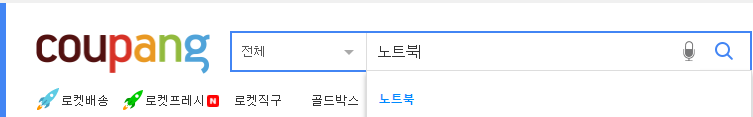

In [1]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "쿠팡.png", width = 600, height = 300)

In [2]:
import numpy as np
import re
import requests
from bs4 import BeautifulSoup

In [3]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36"}

In [4]:
#for i in (1,2,3,4,5):  # {} 와 format 사용
for i in range(1, 6): 
    url = "https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={}&rocketAll=false&searchIndexingToken=1=4&backgroundColor=".format(i)
    print(url)

https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page=1&rocketAll=false&searchIndexingToken=1=4&backgroundColor=
https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page=2&rocketAll=false&searchIndexingToken=1=4&backgroundColor=
https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page=3&rocketAll=false&searchIndexingToken=1=4&backgroundColor=
https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%

In [5]:
for i in range(1, 6): 
    
    url = "https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={}&rocketAll=false&searchIndexingToken=1=4&backgroundColor=".format(i)

    res = requests.get(url, headers=headers)
    res.raise_for_status() # 문제 있으면 프로그램 종료 시킬 것

    soup = BeautifulSoup(res.text, "lxml")

    items = soup.find_all("li", attrs = {"class":re.compile("^search-product")})

    for item in items:

        ad_badge = item.find("span", attrs={"class":"ad-badge-text"}) # 광고 상품
        if ad_badge:
            continue

        rate = item.find("em", attrs={"class":"rating"}) # 평점
        if rate:
            rate = rate.get_text()
        else:
            # rate = "평점 없음"
            continue

        rate_cnt = item.find("span", attrs={"class":"rating-total-count"}) # 리뷰 수
        if rate_cnt:
            rate_cnt = rate_cnt.get_text()  # 예 : (26)
            rate_cnt = rate_cnt[1:-1]
        else:
            #rate_cnt = "평점 수 없음"            
            continue

        name = item.find("div", attrs={"class":"name"}).get_text() # 제품명
        if "Apple" in name:
            continue

        price = item.find("strong", attrs={"class":"price-value"}).get_text() # 가격
        
        link = item.find("a", attrs={"class":"search-product-link"})["href"] # 링크

        if float(rate) > 4.5 and int(rate_cnt) > 50:  # 평점 4.5 이상이고 평점 수가 50 이상
            print (name, price, rate, rate_cnt)
            print(f"제품명 : {name}")
            print(f"가격 : {price}")
            print(f"평점 : {rate}점 ({rate_cnt}개)")
            print("바로가기 : {}".format("https://www.coupang.com" + link))
            print("-"*100) # 줄긋기

삼성전자 노트북 플러스 NT550XCR-AD1A 플래티넘 티탄 (Celeron 5205U 39.6cm), NVMe 128GB, 4GB, WIN10 Home 649,000 5.0 58
제품명 : 삼성전자 노트북 플러스 NT550XCR-AD1A 플래티넘 티탄 (Celeron 5205U 39.6cm), NVMe 128GB, 4GB, WIN10 Home
가격 : 649,000
평점 : 5.0점 (58개)
바로가기 : https://www.coupang.com/vp/products/1460148774?itemId=2512339822&vendorItemId=70505369047
----------------------------------------------------------------------------------------------------
삼성전자 노트북 플러스 NT550XCJ-K78WA 퓨어 화이트 (i7-10510U 39.6cm), NVMe 256GB, 8GB + 8GB, WIN10 Home 1,379,000 5.0 158
제품명 : 삼성전자 노트북 플러스 NT550XCJ-K78WA 퓨어 화이트 (i7-10510U 39.6cm), NVMe 256GB, 8GB + 8GB, WIN10 Home
가격 : 1,379,000
평점 : 5.0점 (158개)
바로가기 : https://www.coupang.com/vp/products/1459817856?itemId=2511843147&vendorItemId=70504880374
----------------------------------------------------------------------------------------------------
레노버 ThinkPad 노트북 E595-S01P (Ryzen5 3500U 39.6cm), 256GB, 8GB 678,000 5.0 92
제품명 : 레노버 ThinkPad 노트북 E595-S01P (Ryzen5 3500U 39.6cm), 256GB, 8GB
가격 